### Welocome to your first hands-on on PyTorch
#### In this hands-on you will be building a feed forward network using PyTorch to identify digits from the image.
#### Follow the instructions provided for each cell and code accordingly
#### Once you write the code in each cell make sure you run the cell by hitting **shift + enter**

### Make sure to run the below two cells 

In [1]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz

--2023-02-21 17:06:33--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2023-02-21 17:06:33--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz.1’

MNIST.tar.gz.1          [              <=>   ]  33.20M  10.9MB/s    in 3.1s    

2023-02-21 17:06:37 (10.9 MB/s) - ‘MNIST.tar.gz.1’ saved [34813078]



In [2]:
!tar -zxvf MNIST.tar.gz

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/processed/
MNIST/processed/training.pt
MNIST/processed/test.pt


### Task 1: Download the dataset
- use **MNIST** from **torchvision.datasets** to download the MNIST digits dataset. Make sure the downladed tensors are tansormed to Tensors.
- Genearte train and test loaders of batch size 64 and assign it to variables **trainloader** and **testloader** respectively.

#### Expected output:
    dimension of first batch of trainloader: torch.Size([64, 1, 28, 28])

In [3]:
import torch
from torch import nn
from torchvision.datasets import MNIST
from torchvision import transforms
from torch import optim
import helper


# Download and load the training data
trainset = MNIST(root='./data',  train=True, transform=transforms.ToTensor(), download=True)             ###download trainset
testset = MNIST(root='./data',  train=False, transform=transforms.ToTensor(), download=True)              ###download testset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


image, labels = next(iter(trainloader))
print("dimension of first batch of trainloader:", image.shape)

dimension of first batch of trainloader: torch.Size([64, 1, 28, 28])


### Task 2
- define the method named model_buid() to build a sequential model.
  - parameters: 
       - **input_size** int: number of input features  
       - **hidden_sizes** array of size 3: array of number of nodes in each of the three hidden layers  
       - **output int**: number of nodes at output layer (or number of classes to classify)  
  - returns model: sequential model  
Apply relu activation between each layer and for the **final layer out apply logSoftmax.**  
Logsoftmax log transformation of softmax output which is given by :$$
 \sigma(x_i) =  \log \cfrac{e^{x_i}}{\sum_{k=1}^{N}{e^{x_k}}}$$ where N is the number of classes  
 more information [here](https://pytorch.org/docs/stable/nn.html#torch.nn.LogSoftmax) 
  - using the function you defined, **initilize the model to have input size 784, three hidden layers to have 256, 128 and 64 nodes and finally an output layer of size 10 nodes.**
  
#### Expected output:  
Sequential(  
  (0): Linear(in_features=784, out_features=256, bias=True)  
  (1): ReLU()  
  (2): Linear(in_features=256, out_features=128, bias=True)  
  (3): ReLU()  
  (4): Linear(in_features=128, out_features=64, bias=True)  
  (5): ReLU()  
  (6): Linear(in_features=64, out_features=10, bias=True)  
  (7): LogSoftmax()  
)  


In [4]:
torch.manual_seed(999)
input_size = 784
hidden_sizes = [256,128, 64]
output_size = 10

# Build a feed-forward network
def build_model(input_size, hidden_sizes, output_size):
    ####Start code here
    
    #model = Network(input_size, hidden_sizes, output_size)
    model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),  
                   nn.ReLU(),
                   nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                   nn.ReLU(),
                   nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                   nn.ReLU(),
                   nn.Linear(hidden_sizes[2], output_size),
                   nn.LogSoftmax(dim=1)
                   )
    #### End code
    return model

classifier = build_model(input_size, hidden_sizes, output_size)
print(classifier)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)


### Task 3 : Perform forward pass on single image
- get the images and labels from first batch of trainloader
- sample the first image from the batch and flatten the image tensor from (1 x 28 x 28) to (1, 784)
- using the model you defined in the previous cell perfrom a forward pass on the flattened image and save the network output to variable **log_ps**
- transform log transformed softmax output log_ps to exponential and assign it to ps (hint use torch.exp())
- return the top probability and its index from  **ps** (hint: use ps.topk())  
Since the model is not trained, yet the output class probabilities are uniform.


tensor([[0.0959, 0.0976, 0.0963, 0.1030, 0.0904, 0.1082, 0.0989, 0.1100, 0.0972,
         0.1026]])


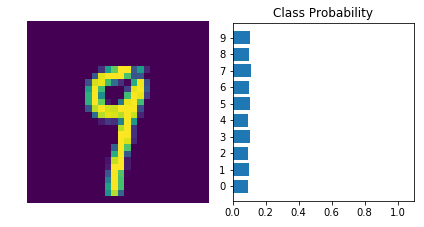

In [5]:
torch.manual_seed(999)
####Start code here
images, labels = iter(trainloader).next()
#print(images.size(), labels.size())
image = images[0,:,:,:]                   ###sample first image from images
image = image.resize_(1,784)                  ###flatten the image

with torch.no_grad():
    log_ps = classifier.forward(image)
ps = torch.exp(log_ps)
print(ps)
top_p, top_class = torch.topk(ps,1)
###End code

helper.view_classify(image.view(1,28,28), ps)
prob = top_p.item()

### Task 4   Define criterain (loss function) and optimizer
  - Define criterian to be [negetive likelihood loss](https://pytorch.org/docs/stable/nn.html#torch.nn.NLLLoss) since the network output is log transformed probabilities. (hint: use nn.NLLLoss())
  - Define optimizer to be [Adam](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam) and set learning rate to 0.003 and pass the parameters of **classifier** model (hint: use optim.Adam())

In [6]:
####Start code here
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(params = classifier.parameters(), lr=0.003)
####End code

### Task 5 Train the classifier

Epoch: 1/5..  Training Loss: 0.107..  Test Loss: 0.145..  Test Accuracy: 0.961
Epoch: 2/5..  Training Loss: 0.080..  Test Loss: 0.093..  Test Accuracy: 0.974
Epoch: 3/5..  Training Loss: 0.063..  Test Loss: 0.083..  Test Accuracy: 0.974
Epoch: 4/5..  Training Loss: 0.052..  Test Loss: 0.090..  Test Accuracy: 0.977
Epoch: 5/5..  Training Loss: 0.047..  Test Loss: 0.092..  Test Accuracy: 0.976
After training


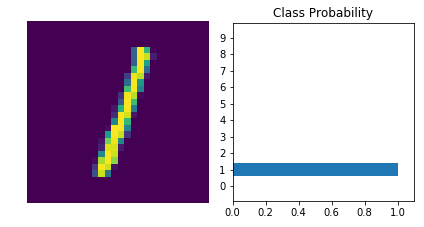

In [8]:
torch.manual_seed(999)

epochs = 5
steps = 0


for e in range(epochs):
    
    ###Initializing loss
    running_loss = 0
    for images, labels in trainloader:
        ###Start code here
        images = images.view(images.shape[0], -1)   ###flatten the images
        optimizer.zero_grad()   
        
        output = classifier.forward(images)         ###perform forward pass
        loss = criterion(output, labels)            ### comput loss using the criterion by passing log_ps and labels
        loss.backward()                             #### call .backward() on loss
        optimizer.step()                            #### update parameters using .step() on optimizer
        
        
        ###End code
        
        running_loss += loss.item()
        
        
    else:
         # Compute loss on test set for each batch of training
        ###Initializing train loss and test loss
        test_loss = 0
        accuracy = 0
        
        
        with torch.no_grad():
            for images, labels in testloader:
                ###Start code here
                images = images.view(images.shape[0], -1)      ### flatten images
                log_ps = classifier.forward(images)            ###perform forward pass
                test_loss += criterion(log_ps, labels)         ### update the test loss    
                             
                ps = torch.exp(log_ps)                         ### transform log_ps to exponential          
                top_p, top_class = torch.topk(ps,1)            ### get the top class for each sample
                ####End code
                
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
print("After training")
helper.view_classify(images[0].view(1,28,28), ps[0])
with open("output.txt", "w") as file:
    file.write("{:.2f}".format(prob)+"\n")
    file.write(("{:.2f}".format(running_loss)))